# **Students Performance Prediction**

## **1. Importing Libararies**

In [202]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import tensorflow
import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

## **2. Reading Data and Header View**

In [203]:
df = pd.read_csv("Student_performance_data _.csv")
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


## **3. Shape of Data**

In [204]:
df.shape

(2392, 15)

## **4. Info about Data**

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


## **5. Null Values Distribution**

In [206]:
df.isnull().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

## **6. Duplicated Rows**

In [207]:
df.duplicated().sum()

0

## **7. Description of Data**

In [208]:
df.describe(include='all')

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


## **8. Target Column Classes**

In [209]:
df['GradeClass'].value_counts()

GradeClass
4.0    1211
3.0     414
2.0     391
1.0     269
0.0     107
Name: count, dtype: int64

## **9. Train Test Split**

In [210]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['StudentID', 'GradeClass']),
                                                    df['GradeClass'],
                                                    test_size=0.2,
                                                    random_state=42)

## **10. Columns Indices**

In [211]:
numerical_columns = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

## **11. Creating Pipelines**

In [212]:
handle_numerical = Pipeline(steps=[
    ('impute', KNNImputer(n_neighbors=5)),
    ('scale', MinMaxScaler())
])

## **12. Transforming Pipelines**

In [213]:
preprocessing = ColumnTransformer(transformers=[
    ('numerical', handle_numerical, numerical_columns)
])

## **13. Modeling**

In [214]:
model = Sequential()
model.add(Dense(12, activation='relu', input_shape=(13,)))
model.add(Dense(12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [215]:
model.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_74 (Dense)                │ (None, 12)             │           168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_75 (Dense)                │ (None, 12)             │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_76 (Dense)                │ (None, 12)             │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_77 (Dense)                │ (None, 5)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 545 (2.13 KB)

 Trainable params: 545 (2.13 KB)

 Non-trainable params: 0 (0.00 B)

In [216]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [217]:
X_train = preprocessing.fit_transform(X_train)
X_test = preprocessing.fit_transform(X_test)

In [218]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.1420 - loss: 1.6354 - val_accuracy: 0.4543 - val_loss: 1.5646
Epoch 2/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5189 - loss: 1.5291 - val_accuracy: 0.4700 - val_loss: 1.4747
Epoch 3/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5321 - loss: 1.4031 - val_accuracy: 0.4700 - val_loss: 1.3906
Epoch 4/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5205 - loss: 1.3128 - val_accuracy: 0.4700 - val_loss: 1.3330
Epoch 5/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5156 - loss: 1.2485 - val_accuracy: 0.4700 - val_loss: 1.2600
Epoch 6/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5254 - loss: 1.1482 - val_accuracy: 0.4700 - val_loss: 1.1725
Epoch 7/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5117 - loss: 1.0849 - val_accuracy: 0.5039 - val_loss: 1.0902
Epoch 8/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5835 - loss: 0.9796 - val_accuracy: 0.5927 - v

## **14. Prediction through Model**

In [219]:
y_pred = model.predict(X_test)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [220]:
y_pred_classes = np.argmax(y_pred, axis=1)

## **15. Accuracy of Model**

In [221]:
print(classification_report(y_test, y_pred_classes, zero_division=0))

              precision    recall  f1-score   support

         0.0       0.75      0.27      0.40        22
         1.0       0.58      0.78      0.67        49
         2.0       0.76      0.69      0.72        85
         3.0       0.78      0.74      0.76        86
         4.0       0.92      0.95      0.94       237

    accuracy                           0.82       479
   macro avg       0.76      0.69      0.70       479
weighted avg       0.82      0.82      0.81       479



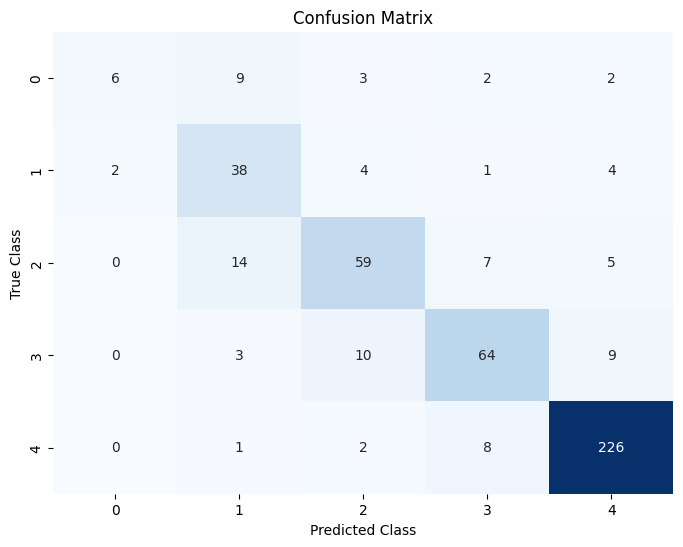

In [222]:
cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

## **16. Plotting between loss and val_loss**

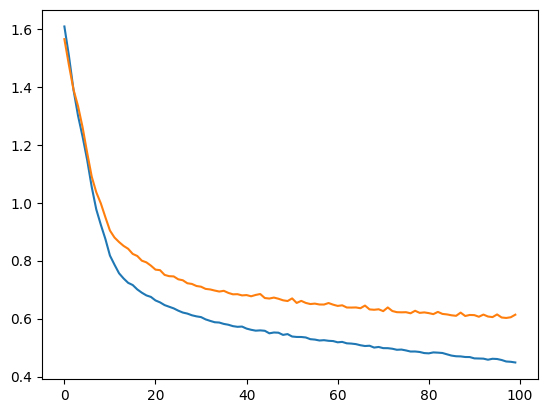

In [223]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

## **17. Plotting between accuracy and val_accuracy**

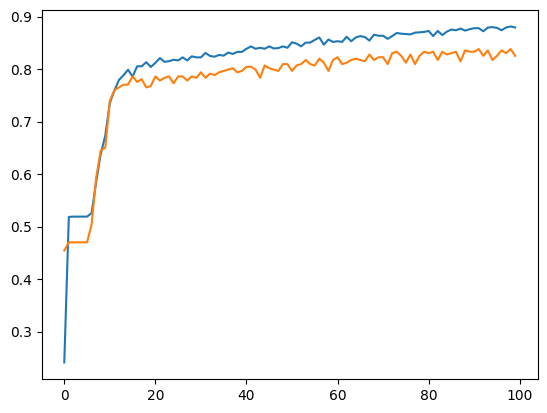

In [224]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()